# Introduction
<hr style="border:2px solid black"> </hr>

In [1]:
"""
What? Bagging with random forest applied to regression & classification. A simple hyperparameterisation is 
      shown

Corey Wade. “Hands-On Gradient Boosting with XGBoost and scikit-learn
https://github.com/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn
"""

'\nWhat? Bagging with random forest\n\nRevision No: 1\nLaste revised: 08/02/21\nReference: Corey Wade. “Hands-On Gradient Boosting with XGBoost and scikit-learn\nGLM\n'

# Import python modules

In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Random forest classifier

In [13]:
# Upload csv file 'census_cleaned' as df_census
df_census = pd.read_csv('../DATASETS/census_cleaned.csv')

In [14]:
# Split data into X and y
X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

In [15]:
# Initialize the classifier
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

# Obtain scores of cross-validation to the get the mean performance
scores = cross_val_score(rf, X_census, y_census, cv=5)

# Display accuracy
print('Accuracy:', np.round(scores, 3))

# Display mean accuracy
print('Accuracy mean: %0.3f' % (scores.mean()))

Accuracy: [0.851 0.844 0.851 0.852 0.851]
Accuracy mean: 0.850


In [16]:
"""
Why does it perform better than decision trees?
With 10 trees in this forest (since n_estimators=10), each prediction is based on 10 decision trees instead of 1.
The trees are bootstrapped, which increases diversity, and aggregated, which reduces variance.
"""

'\nWhy does it perform better than decision trees?\nWith 10 trees in this forest (since n_estimators=10), each prediction is based on 10 decision trees instead of 1.\nThe trees are bootstrapped, which increases diversity, and aggregated, which reduces variance.\n'

# Random forest regressor

In [17]:
# Upload csv file 'bike_rentals_cleaned' as df_bikes
df_bikes = pd.read_csv('../DATASETS/bike_rentals_cleaned.csv')

In [18]:
# Split data into X and y
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

In [19]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs=-1)

# Obtain scores of cross-validation using num_splits and mean squared error to the get the mean performance
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

# Take square root of the scores
rmse = np.sqrt(-scores)

# Display accuracy
print('RMSE:', np.round(rmse, 3))

# Display mean score
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE: [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]
RMSE mean: 945.365


# Random Forest Hyperparameters

In [20]:
"""
What is the oob_score (Out Of Bag score)?

Random forests select decision trees via bagging, meaning that samples are selected with replacement. After 
all of the samples have been chosen, some samples should remain that have not been chosen.

It's possible to hold back these samples as the test set. After the model is fit on one tree, the model can 
immediately be scored against this test set. When the hyperparameter is set to oob_score=True, this is exactly
what happens.

In other words, oob_score provides a shortcut to get a test score. oob_score may be printed out immediately 
after the model has been fit.

When the number of trees in the forest is small, as is the case with 10 estimators, there may not be enough 
test samples to maximize accuracy.
"""

"\nWhat is the oob_score (Out Of Bag score)?\n\nRandom forests select decision trees via bagging, meaning that samples are selected with replacement. After \nall of the samples have been chosen, some samples should remain that have not been chosen.\n\nIt's possible to hold back these samples as the test set. After the model is fit on one tree, the model can \nimmediately be scored against this test set. When the hyperparameter is set to oob_score=True, this is exactly\nwhat happens.\n\nIn other words, oob_score provides a shortcut to get a test score. oob_score may be printed out immediately \nafter the model has been fit.\n\nWhen the number of trees in the forest is small, as is the case with 10 estimators, there may not be enough \ntest samples to maximize accuracy.\n"

In [24]:
# Intialize Random Forest Classifier with oob_score=True
rf = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf.fit(X_census, y_census)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [25]:
# Display oob score
rf.oob_score_

0.8343109855348423

In [26]:
# Intialize Random Forest Classifier with n_estimators=50 and oob_score=True
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf.fit(X_census, y_census)

# Display oob_score
rf.oob_score_

0.8518780135745216

In [27]:
# Intialize Random Forest Classifier with n_estimators=100 and oob_score=True
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf.fit(X_census, y_census)

# Display oob_score
rf.oob_score_

0.8551334418476091

In [28]:
"""
The warm_start hyperparameter is great for determining the number of trees in the forest (n_estimators). 
When warm_start=True, adding more trees does not require starting over from scratch. If you change 
n_estimators from 100 to 200, it may take twice as long to build the forest with 200 trees. When 
warm_start=True, the random forest with 200 trees does not start from scratch, but rather starts where 
the previous model stopped.”
"""

'\nThe warm_start hyperparameter is great for determining the number of trees in the forest (n_estimators). \nWhen warm_start=True, adding more trees does not require starting over from scratch. If you change \nn_estimators from 100 to 200, it may take twice as long to build the forest with 200 trees. When \nwarm_start=True, the random forest with 200 trees does not start from scratch, but rather starts where \nthe previous model stopped.”\n'

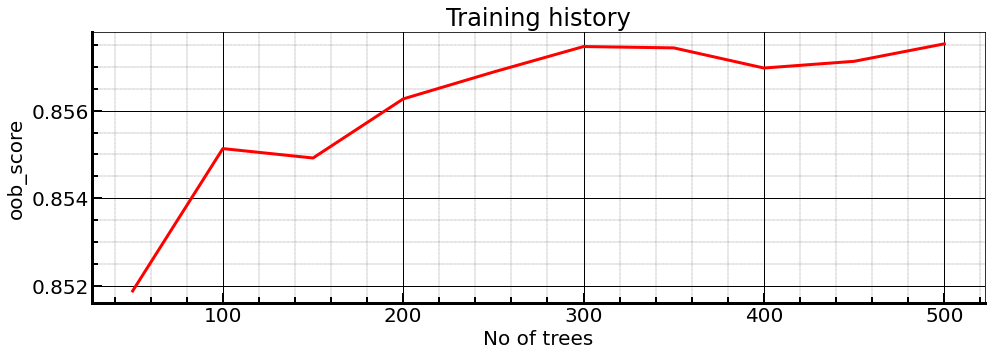

In [30]:
# Intialize empty list of oob_scores
oob_scores = []

# Initalize Random Forest as rf with 50 estimators, warm_start=True, and oob_score=True
rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)
# Fit rf to Census dataset
rf.fit(X_census, y_census)
# Append rf_oob_score to oob_scores list
oob_scores.append(rf.oob_score_)
# Initalize est to 50
est = 50
# Initalize estimtators list with est
estimators=[est]

# Use for loop from 0 -9 
for i in range(9):    
    # Add 50 to est
    est += 50    
    # Append est to estimators list
    estimators.append(est)
    # Set n_estimators to est
    rf.set_params(n_estimators=est)    
    # Fit rf on Census dataset
    rf.fit(X_census, y_census)    
    # Append rf_oob_score to oob_scores list
    oob_scores.append(rf.oob_score_)

# Plotting
rcParams['figure.figsize'] = 16, 5
rcParams['font.size'] = 20
fig, ax = pyplot.subplots()
ax.plot(estimators, oob_scores, "r", lw = 3)
pyplot.xlabel('No of trees')
pyplot.ylabel("oob_score")
pyplot.title('Training history')
ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.minorticks_on()
#ax.legend()
pyplot.show()